In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import cos, pi

In [6]:
# расчёт взаимной индуктивности между двумя соосными катушками индуктивности в зависимости от расстояния
def mutual_inductance(R1, R2=2.8, d=0.5, N=360, K=360):
    df1 = 2*pi/N
    df2=2*pi/K
    M = 0
    for n in range(N):
        for k in range(K):
            r12 = (R1 ** 2 + R2 ** 2 - 2 * R1 * R2 * cos(df1 * n - df2 * k) + d ** 2) ** 0.5
            M += (cos(df2 * k - df1 * n) * df1 * df2) / r12
    M *= R1 * R2 / (4 * pi)
    return M

# отрисовка и сохранение графика в формате .png
def plot(x, y, save=False, points=[], name="Взаимная индуктивность между двумя витками",
        x_label="R1, см", y_label="M, мкГн"):
    plt.title(name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y)
    if save:
        plt.savefig(f"pictures/{name}.png")
    if points:
        for point in points:
            plt.scatter(point[0], point[1], cmap="red")
    plt.show()
    
# расчёт коэффициента заполенения
def fill_factor(R_in, R_out):
    return (R_out - R_in) / (R_out + R_in)

**Расчёт взаимной индуктивности между двумя витками R1=2.8см R2=2...10см, расстояние между катушками равно d=0.5см**

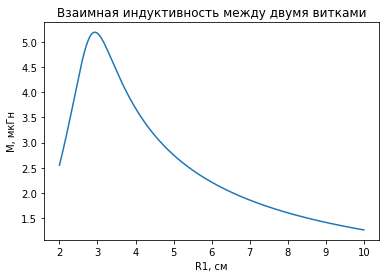

Коэффициент заполнения: 0.02250489236790609
R2, при котором взаимная индуктивность достигает максимальных значений: 2.928928928928929 см


In [7]:
R1 = 2.8
R2 = np.linspace(2, 10, 1000)
d = 2
M = mutual_inductance(R2)
plot(R2, M)

print(f"Коэффициент заполнения: {fill_factor(R1, R2[np.argmax(M)])}")
print(f"R2, при котором взаимная индуктивность достигает максимальных значений: {R2[np.argmax(M)]} см")

**Применение steepest ascent hill climbing к поиску радиуса при котором взаимная индуктивность будет максимальной**

In [8]:
# импортируем класс алгоритма hill climbing
from optimization.hill_climbing_algorithms.steepest_ascent_hill_climbing import SteepestAscentHillClimbing

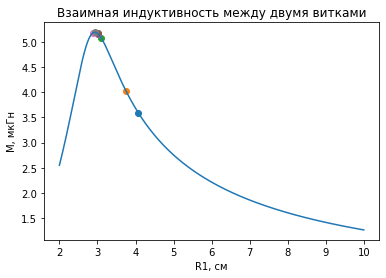

Всего мутаций: 100
Хороших мутаций: 8
Плохих мутаций: 92
Значение радиуса: 2.9334675211607086 см


In [9]:
alg = SteepestAscentHillClimbing(iteration=100,
                                start=2, finish=10,
                                fitness=mutual_inductance)
alg.run()
plot(R2, M, points=alg.good_mutation)
print(f"Всего мутаций: {len(alg.all_mutation)}")
print(f"Хороших мутаций: {len(alg.good_mutation)}")
print(f"Плохих мутаций: {len(alg.bad_mutation)}")
print(f"Значение радиуса: {alg.x0} см")